In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk


In [ ]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=10
page_size=100

reviews=[]

for i in range(1,pages+1):

    print(f"Scraping page {i}")

    # Creating url from a page to collect data
    # url = https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100

    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")




Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.sample(10)

,reviews
140,✅ Trip Verified | Busy day at LHR and flight ...
887,✅ Trip Verified | Faro to Heathrow. Flight wa...
419,✅ Trip Verified | British Airways are in the ...
632,✅ Trip Verified | Warsaw to London. Everythin...
856,✅ Trip Verified | Belfast City to Atlanta via...
26,✅ Trip Verified | The worst airline I have e...
19,✅ Trip Verified | I am a frequent flyer with...
421,✅ Trip Verified | Absolutely bad experience w...
567,✅ Trip Verified | A short hop from London to ...
96,Not Verified | Horrible airline. Does not care...


In [ ]:
df.to_csv("C:\Data Science\Internship\British Airways\British Airways.csv")


In [3]:
df=pd.read_csv("British Airways.csv")

Removing the punctuation

In [4]:
df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


<ipython-input-4-91d5aada4604>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


In [5]:
df["review_processed"]

0        Trip Verified    Booked online months ago an...
1        Trip Verified    The flight was on time  The...
2      Not Verified    Angry  disappointed  and unsat...
3        Trip Verified    As an infrequent flyer  Bri...
4      Not Verified    A totally unremarkable flight ...
                             ...                        
995      Trip Verified    San Francisco to London  Te...
996      Trip Verified    Heathrow to Vancouver  The ...
997      Trip Verified    London to Bucharest  First ...
998      Trip Verified    I forgot I had purchased a ...
999      Trip Verified    When the passenger in front...
Name: review_processed, Length: 1000, dtype: object

Replacing the shorter words with space

In [6]:
df['review_processed']=df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['review_processed']


0      Trip Verified Booked online months ago and the...
1      Trip Verified The flight was time The crew wer...
2      Not Verified Angry disappointed and unsatisfie...
3      Trip Verified infrequent flyer British Airways...
4      Not Verified totally unremarkable flight time ...
                             ...                        
995    Trip Verified San Francisco London Terrible se...
996    Trip Verified Heathrow Vancouver The seats boo...
997    Trip Verified London Bucharest First class gro...
998    Trip Verified forgot had purchased hand baggag...
999    Trip Verified When the passenger front recline...
Name: review_processed, Length: 1000, dtype: object

Converting all words into lower case

In [7]:
df['review_processed']=[row.lower() for row in df['review_processed']]
df['review_processed']

0      trip verified booked online months ago and the...
1      trip verified the flight was time the crew wer...
2      not verified angry disappointed and unsatisfie...
3      trip verified infrequent flyer british airways...
4      not verified totally unremarkable flight time ...
                             ...                        
995    trip verified san francisco london terrible se...
996    trip verified heathrow vancouver the seats boo...
997    trip verified london bucharest first class gro...
998    trip verified forgot had purchased hand baggag...
999    trip verified when the passenger front recline...
Name: review_processed, Length: 1000, dtype: object

Removing the stop words

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
add_words = ['movie','film','one','make','even','see','movies','get','makes','making','time','watch','character', 'like', 'good','well','would','really']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

In [9]:
def remove_stopwords(rev):
    # input : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

In [10]:
df['review_processed']=[remove_stopwords(r) for r in df['review_processed']]

In [14]:
df['review_processed']

0      trip verified booked online months ago hitch r...
1      trip verified flight time crew polite story ou...
2      verified angry disappointed unsatisfied route ...
3      trip verified infrequent flyer british airways...
4      verified totally unremarkable flight time comf...
                             ...                        
995    trip verified san francisco london terrible se...
996    trip verified heathrow vancouver seats booked ...
997    trip verified london bucharest first class gro...
998    trip verified forgot purchased hand baggage fa...
999    trip verified passenger front reclines seat ma...
Name: review_processed, Length: 1000, dtype: object

Lemmatisation

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [18]:
lemmatiser = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ

  elif nltk_tag.startswith('V'):
    return wordnet.VERB

  elif nltk_tag.startswith('N'):
      return wordnet.NOUN

  elif nltk_tag.startswith('R'):
      return wordnet.ADV
  else:
      return None


In [19]:
def lemmatize_sentence(sentence):

  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

  lemmatized_sentence = []

  for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatiser.lemmatize(word, tag))

  return " ".join(lemmatized_sentence)

df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))


In [23]:
df['review_processed']

0      trip verify booked online month ago hitch repl...
1      trip verify flight time crew polite story outw...
2      verified angry disappoint unsatisfied route lo...
3      trip verify infrequent flyer british airway al...
4      verify totally unremarkable flight time comfor...
                             ...                        
995    trip verify san francisco london terrible serv...
996    trip verify heathrow vancouver seat book give ...
997    trip verify london bucharest first class groun...
998    trip verify forgot purchase hand baggage fare ...
999    trip verify passenger front reclines seat make...
Name: review_processed, Length: 1000, dtype: object

Plotting frquent words

<Axes: xlabel='count', ylabel='word'>

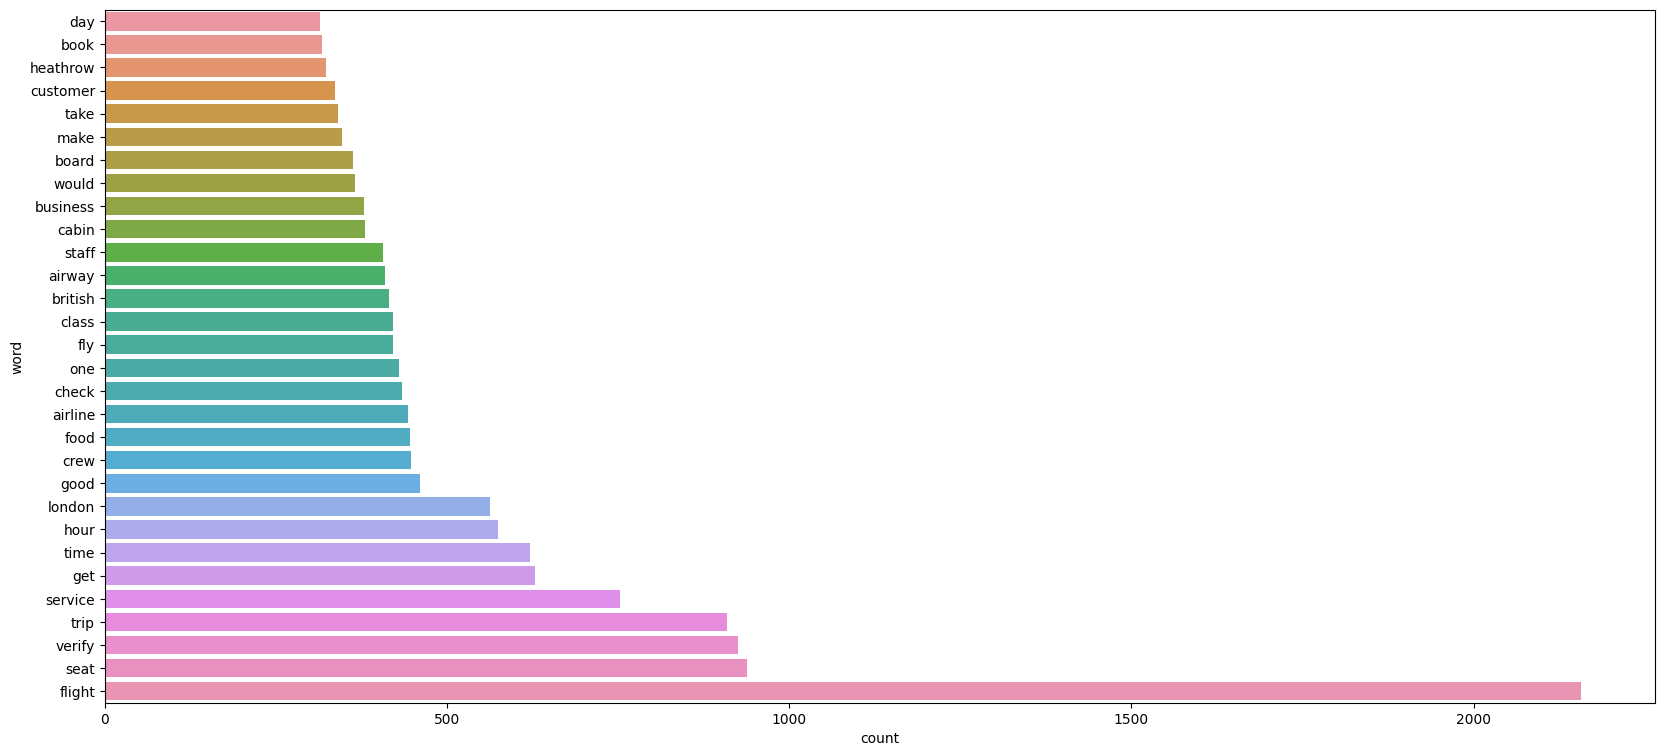

In [29]:
import seaborn as sns
from nltk import FreqDist
import matplotlib.pyplot as plt

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30)

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,9))
# ax = plt.barh(words_df['word'], width = words_df['count'])
# plt.show()

sns.barplot(y=words_df['word'],x=words_df['count'])


Word Cloud

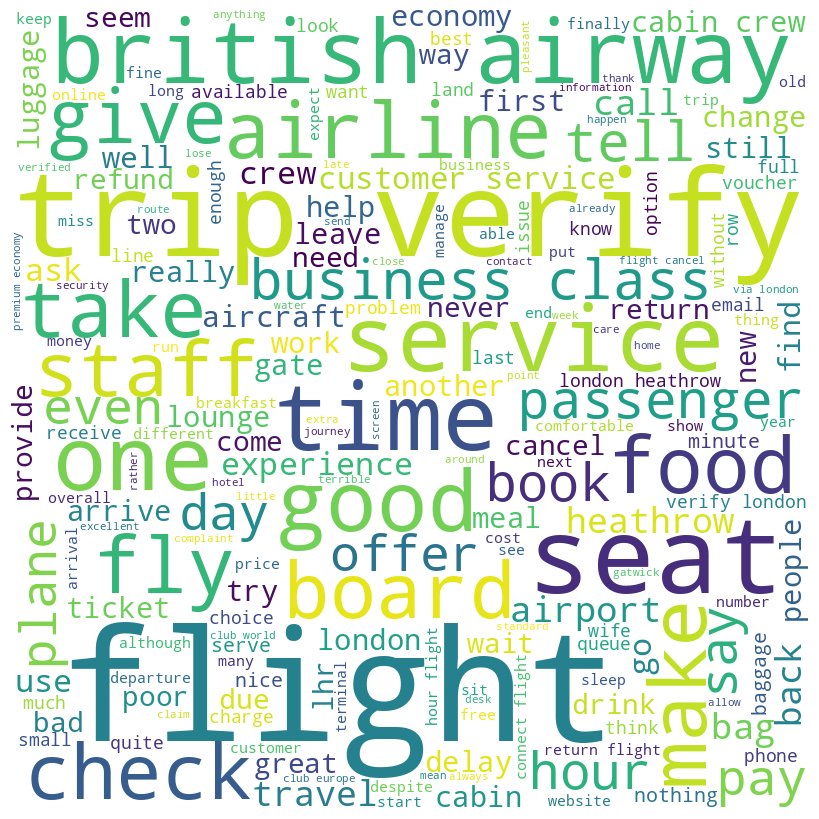

In [30]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['review_processed']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()